# Intro

In this notebook, you will learn about
- Getting data from a csv file
- Basic indexing and manipulation
- Saving data for later use with `np.savez`
- Basic built-in NumPy tools for plotting and integrating with Matplotlib.

---

## 1. What is NumPy?

NumPy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.

The NumPy library contains multidimensional array and matrix data structures (you’ll find more information about this in later sections). It provides ndarray, a homogeneous n-dimensional array object, with methods to efficiently operate on it. NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.

Learn more about NumPy [here!](https://numpy.org/devdocs/user/whatisnumpy.html#whatisnumpy)

To access NumPy and its functions import it in your Python code like this:

In [1]:
import numpy as np

We shorten the imported name to `np` for better readability of code using NumPy. This is a widely adopted convention that you should follow so that anyone working with your code can easily understand it.

### What's the difference between a Python list and a NumPy array?

NumPy gives you an enormous range of fast and efficient ways of creating arrays and manipulating numerical data inside them. While a Python list can contain different data types within a single list, all of the elements in a NumPy array should be homogeneous. The mathematical operations that are meant to be performed on arrays would be extremely inefficient if the arrays weren’t homogeneous.

### Why use NumPy?

NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further.

### What is an array?

An array is a central data structure of the NumPy library. An array is a grid of values and it contains information about the raw data, how to locate an element, and how to interpret an element. It has a grid of elements that can be indexed in various ways. The elements are all of the same type, referred to as the array dtype.

An array can be indexed by a tuple of nonnegative integers, by booleans, by another array, or by integers. The rank of the array is the number of dimensions. The shape of the array is a tuple of integers giving the size of the array along each dimension.

One way we can initialize NumPy arrays is from Python lists, using nested lists for two- or higher-dimensional data. For this, we can use the `np.array()` function.

For example:

In [2]:
a = np.array([1, 2, 3, 4, 5, 6])

or:

In [3]:
a = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12]])

We can access the elements in the array using square brackets. When you’re accessing elements, remember that indexing in NumPy starts at 0. That means that if you want to access the first element in your array, you’ll be accessing element “0”.

In [4]:
print(a[0])

[1 2 3 4]


You might occasionally hear an array referred to as a “ndarray,” which is shorthand for “N-dimensional array.” An N-dimensional array is simply an array with any number of dimensions. You might also hear 1-D, or one-dimensional array, 2-D, or two-dimensional array, and so on. The NumPy ndarray class is used to represent both matrices and vectors. A vector is an array with a single dimension (there’s no difference between row and column vectors), while a matrix refers to an array with two dimensions. For 3-D or higher dimensional arrays, the term tensor is also commonly used.

![TODO](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png width=100px)

### What are the attributes of an array?

An array is usually a fixed-size container of items of the same type and size. The number of dimensions and items in an array is defined by its shape. The shape of an array is a tuple of non-negative integers that specify the sizes of each dimension.

In NumPy, dimensions are called axes. This means that if you have a 2D array that looks like this:

```python
[[0., 0., 0.],
 [1., 1., 1.]]
```

Your array has 2 axes. The first axis has a length of 2 and the second axis has a length of 3.

Just like in other Python container objects, the contents of an array can be accessed and modified by indexing or slicing the array. Unlike the typical container objects, different arrays can share the same data, so changes made on one array might be visible in another.

Array attributes reflect information intrinsic to the array itself. If you need to get, or even set, properties of an array without creating a new array, you can often access an array through its attributes.

## 2. A problem to explore

From [Wikipedia](https://en.wikipedia.org/wiki/Cost_of_living):
    
    Cost of living is the cost of maintaining a certain standard of living. Changes in the cost of living over time are often operationalized in a cost-of-living index. Cost of living calculations are also used to compare the cost of maintaining a certain standard of living in different geographic areas. Differences in cost of living between locations can also be measured in terms of purchasing power parity rates. 
    
From [Numbeo](https://www.numbeo.com), it is possible to obtain data about the cost of living and quality of life indices for several cities across the world as a `.csv` (comma separated values) file. We will explore this data using NumPy and its array manipulating capabilities.

### Getting data from a `.csv` file

CSV files are standard in data analysis and other applications. Because we are mostly interested in the array manipulations, we will use the [pandas library](https://pandas.pydata.org/), which is the industry standard, to obtain the data and later convert it into NumPy arrays. 

In [5]:
import pandas as pd

cost_of_living = pd.read_csv('../data/Cost_of_living_index.csv')
quality_of_life = pd.read_csv('../data/quality_of_life_index.csv')

First, let's explore what is in each file:

In [6]:
cost_of_living

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Hamilton, Bermuda",137.56,103.03,121.21,126.56,151.77,114.19
1,2,"Zurich, Switzerland",128.65,62.62,97.39,127.35,127.14,142.39
2,3,"Basel, Switzerland",126.89,46.14,88.66,120.44,129.10,141.48
3,4,"Lausanne, Switzerland",119.62,50.35,86.83,116.35,122.83,132.58
4,5,"Bern, Switzerland",118.42,39.22,80.93,114.54,114.86,115.48
...,...,...,...,...,...,...,...,...
531,532,"Vadodara, India",22.28,3.78,13.52,22.26,14.43,74.59
532,533,"Kochi, India",21.73,5.45,14.02,21.93,12.20,73.42
533,534,"Visakhapatnam, India",21.52,4.26,13.35,21.09,17.09,55.47
534,535,"Navi Mumbai, India",19.30,4.70,12.39,19.21,12.55,138.06


In [7]:
quality_of_life

,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,"Canberra, Australia",204.86,98.62,77.66,81.98,76.12,5.10,24.09,13.52,82.72
1,2,"Adelaide, Australia",202.30,96.69,71.25,80.61,74.32,4.21,24.18,18.26,94.96
2,3,"Raleigh, NC, United States",202.09,131.63,65.12,75.64,66.84,3.18,32.79,22.61,83.88
3,4,"Wellington, New Zealand",195.73,86.22,71.78,74.90,77.15,6.46,27.74,13.69,97.68
4,5,"Charlotte, NC, United States",195.65,140.43,55.07,74.62,70.98,2.32,35.09,28.44,84.05
...,...,...,...,...,...,...,...,...,...,...,...
242,243,"Rio de Janeiro, Brazil",64.61,18.38,22.37,44.63,37.42,26.81,51.40,67.40,88.22
243,244,"Dhaka, Bangladesh",53.31,21.71,35.33,39.97,35.55,17.70,58.62,93.33,71.29
244,245,"Lagos, Nigeria",49.58,8.69,34.43,46.04,35.99,13.15,66.78,89.46,60.75
245,246,"Manila, Philippines",45.45,19.55,35.34,63.07,41.58,34.44,54.36,89.86,61.23


From [Numbeo](https://www.numbeo.com/cost-of-living/cpi_explained.jsp):

    Cost of living indices are relative to New York City (NYC). Which means that for New York City, each index should be 100(%). If another city has, for example, rent index of 120, it means that on an average in that city rents are 20% more expensive than in New York City. If a city has rent index of 70, that means on average rent in that city is 30% less expensive than in New York City. 

For more details on the other indices, check Numbeo's website.

## 3. Array properties

At this point, because we used pandas to obtain the data from the csv files, what we have are objects called [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html):

In [8]:
type(quality_of_life)

pandas.core.frame.DataFrame

To create a NumPy array from this data, you can use the `np.array()` function:

In [9]:
data = np.array(quality_of_life)
data

array([[1, 'Canberra, Australia', 204.86, ..., 24.09, 13.52, 82.72],
       [2, 'Adelaide, Australia', 202.3, ..., 24.18, 18.26, 94.96],
       [3, 'Raleigh, NC, United States', 202.09, ..., 32.79, 22.61,
        83.88],
       ...,
       [245, 'Lagos, Nigeria', 49.58, ..., 66.78, 89.46, 60.75],
       [246, 'Manila, Philippines', 45.45, ..., 54.36, 89.86, 61.23],
       [247, 'Tehran, Iran', 35.88, ..., 52.9, 81.34, 70.99]],
      dtype=object)

The last line containes the expression `dtype=object`. As we mentioned before, what makes NumPy arrays efficient is the fact that it contains homogeneous data, meaning that every entry should have the same data type. Because we tried creating an array with different data types (integer numbers in the first column, character strings in the second, floating point numbers for the others), the only possible way for this array to contain a homogeneous set of data is by using the `object` data type, which is very general and includes all the data described. However, this is clearly as inefficient as using a plain Python list (maybe even worse!).

To fix this, let's select only a subset of the data to put in our NumPy array.

In [10]:
quality_index = np.array(quality_of_life['Quality of Life Index'])
quality_index

array([204.86, 202.3 , 202.09, 195.73, 195.65, 194.03, 192.97, 191.33,
       190.39, 190.38, 189.85, 189.49, 189.36, 187.7 , 186.38, 185.99,
       184.49, 184.01, 183.48, 183.47, 182.79, 182.63, 182.12, 181.27,
       180.95, 180.52, 180.  , 179.84, 178.91, 177.79, 177.71, 177.15,
       176.83, 176.21, 175.6 , 175.06, 174.77, 174.71, 174.38, 173.92,
       173.77, 173.68, 173.43, 173.32, 173.21, 173.08, 172.88, 172.84,
       172.67, 172.12, 171.84, 171.61, 170.94, 170.88, 169.67, 169.57,
       169.46, 168.61, 168.6 , 168.58, 167.62, 166.64, 166.62, 166.41,
       166.36, 165.77, 165.38, 165.05, 164.74, 164.63, 164.58, 164.46,
       164.41, 163.78, 163.76, 163.52, 163.13, 162.82, 162.46, 162.01,
       161.93, 161.11, 161.11, 160.87, 160.77, 160.7 , 160.1 , 160.01,
       159.21, 159.1 , 158.39, 158.14, 158.01, 157.58, 156.55, 155.88,
       155.7 , 155.55, 155.3 , 153.81, 152.75, 152.59, 152.2 , 152.18,
       152.07, 150.84, 150.34, 150.06, 149.5 , 149.32, 149.17, 149.09,
      

Now, you can check the data type of this new array by querying the `dtype` property of this array:

In [11]:
quality_index.dtype

dtype('float64')

As expected, the data type for the `quality_index` array is now `float64`, or 64-bit floating point numbers.

Now, let's look at the "Rank" column of our `quality_of_life` DataFrame:

In [12]:
rank = np.array(quality_of_life['Rank'])
rank

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
rank.dtype

dtype('int64')

Here we have integer data, but not that we could have selected a different data type to represent these items by using the `dtype` keyword when calling the `np.array()` function. Different data types available can be found [here](dtype documentation).

In [14]:
rank_float = np.array(rank, dtype=np.float64)
rank_float

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

### Shape and size

At this point, we may also be interested in checking for the physical layout of this array, like its size. If you are used to Python lists, you may be tempted to apply the `len` function to this array:

In [15]:
len(quality_index)

247

However, there are specific properties provided by NumPy for this information:

- `.ndim` will tell you the number of axes, or dimensions, of the array.
- `.size` will tell you the total number of elements of the array. This is the product of the elements of the array’s shape.
- `.shape` will display a tuple of integers that indicate the number of elements stored along each dimension of the array. If, for example, you have a 2-D array with 2 rows and 3 columns, the shape of your array is (2, 3).

In [16]:
quality_index.ndim

1

In [17]:
quality_index.size

247

In [18]:
quality_index.shape

(247,)

Note that we could also have selected a 2-dimensional subset of the data, by choosing to represent two columns of the initial DataFrame as a NumPy array:

In [19]:
quality_safety = np.array(quality_of_life[['Quality of Life Index', 'Safety Index']])

In [20]:
quality_safety

array([[204.86,  77.66],
       [202.3 ,  71.25],
       [202.09,  65.12],
       [195.73,  71.78],
       [195.65,  55.07],
       [194.03,  56.21],
       [192.97,  83.34],
       [191.33,  50.07],
       [190.39,  62.81],
       [190.38,  65.48],
       [189.85,  55.65],
       [189.49,  54.6 ],
       [189.36,  75.79],
       [187.7 ,  58.03],
       [186.38,  65.58],
       [185.99,  49.87],
       [184.49,  75.55],
       [184.01,  73.05],
       [183.48,  42.26],
       [183.47,  50.3 ],
       [182.79,  74.03],
       [182.63,  64.04],
       [182.12,  63.26],
       [181.27,  53.9 ],
       [180.95,  72.66],
       [180.52,  77.87],
       [180.  ,  51.11],
       [179.84,  82.44],
       [178.91,  71.1 ],
       [177.79,  30.17],
       [177.71,  64.98],
       [177.15,  70.  ],
       [176.83,  85.33],
       [176.21,  66.31],
       [175.6 ,  69.32],
       [175.06,  50.65],
       [174.77,  55.99],
       [174.71,  74.01],
       [174.38,  56.65],
       [173.92,  78.79],


Now:

In [21]:
len(quality_safety)

247

In [22]:
quality_safety.ndim

2

In [23]:
quality_safety.size

494

In [24]:
quality_safety.shape

(247, 2)

In this case, it is clear that the `len` function is no longer appropriate, and that NumPy arrays require a bit more information to be understood correctly.

### Exercises

## 4. Basic indexing and manipulation

In the original `quality_of_life` table, the data corresponding to the city of Lagos in Nigeria had index 244. Let's consult its data from the current `quality_safety` array:

In [25]:
quality_safety[244]

array([49.58, 34.43])

Because of the way we built this array, at position 244 we have two items: the Quality of Life Index in the first position, and the Safety Index in the second position. We can access those individually by using the following syntax:

In [26]:
quality_safety[244, 0]

49.58

We could also use 

In [27]:
quality_safety[244][0]

49.58

We can also access the extremities of our array:

In [28]:
quality_safety[0]

array([204.86,  77.66])

In [29]:
quality_safety[-1]

array([35.88, 45.09])

In [30]:
quality_safety.shape

(247, 2)

Note that because this is a two-dimensional array, the shape is a 2-item tuple. 

Because the indexing starts at 0, a shape of `(247, 2)` means an index range from 0 to 246, and if we try to access index 247 this will raise an `IndexError`:

In [31]:
quality_safety[247]

IndexError: index 247 is out of bounds for axis 0 with size 247

### Exercises

## 5. Operations and built-in utilities

Arrays can be operated on as single objects, simplifying the way we manipulate data. Say we wish to increase every item in the array by 1 unit. We could do:

In [32]:
for i in range(quality_index.shape[0]):
    quality_index[i] += 1

In general, looping through an array is not necessary or efficient. Because of the vectorization properties of NumPy arrays, we could do instead

In [33]:
quality_index += 1

This is valid for other operations as well.

In [34]:
2*quality_index

array([413.72, 408.6 , 408.18, 395.46, 395.3 , 392.06, 389.94, 386.66,
       384.78, 384.76, 383.7 , 382.98, 382.72, 379.4 , 376.76, 375.98,
       372.98, 372.02, 370.96, 370.94, 369.58, 369.26, 368.24, 366.54,
       365.9 , 365.04, 364.  , 363.68, 361.82, 359.58, 359.42, 358.3 ,
       357.66, 356.42, 355.2 , 354.12, 353.54, 353.42, 352.76, 351.84,
       351.54, 351.36, 350.86, 350.64, 350.42, 350.16, 349.76, 349.68,
       349.34, 348.24, 347.68, 347.22, 345.88, 345.76, 343.34, 343.14,
       342.92, 341.22, 341.2 , 341.16, 339.24, 337.28, 337.24, 336.82,
       336.72, 335.54, 334.76, 334.1 , 333.48, 333.26, 333.16, 332.92,
       332.82, 331.56, 331.52, 331.04, 330.26, 329.64, 328.92, 328.02,
       327.86, 326.22, 326.22, 325.74, 325.54, 325.4 , 324.2 , 324.02,
       322.42, 322.2 , 320.78, 320.28, 320.02, 319.16, 317.1 , 315.76,
       315.4 , 315.1 , 314.6 , 311.62, 309.5 , 309.18, 308.4 , 308.36,
       308.14, 305.68, 304.68, 304.12, 303.  , 302.64, 302.34, 302.18,
      

We can also perform operations on pairs of arrays:

In [35]:
quality_index+rank

array([207.86, 206.3 , 207.09, 201.73, 202.65, 202.03, 201.97, 201.33,
       201.39, 202.38, 202.85, 203.49, 204.36, 203.7 , 203.38, 203.99,
       203.49, 204.01, 204.48, 205.47, 205.79, 206.63, 207.12, 207.27,
       207.95, 208.52, 209.  , 209.84, 209.91, 209.79, 210.71, 211.15,
       211.83, 212.21, 212.6 , 213.06, 213.77, 214.71, 215.38, 215.92,
       216.77, 217.68, 218.43, 219.32, 220.21, 221.08, 221.88, 222.84,
       223.67, 224.12, 224.84, 225.61, 225.94, 226.88, 226.67, 227.57,
       228.46, 228.61, 229.6 , 230.58, 230.62, 230.64, 231.62, 232.41,
       233.36, 233.77, 234.38, 235.05, 235.74, 236.63, 237.58, 238.46,
       239.41, 239.78, 240.76, 241.52, 242.13, 242.82, 243.46, 244.01,
       244.93, 245.11, 246.11, 246.87, 247.77, 248.7 , 249.1 , 250.01,
       250.21, 251.1 , 251.39, 252.14, 253.01, 253.58, 253.55, 253.88,
       254.7 , 255.55, 256.3 , 255.81, 255.75, 256.59, 257.2 , 258.18,
       259.07, 258.84, 259.34, 260.06, 260.5 , 261.32, 262.17, 263.09,
      

There are subtleties when dealing with arrays of different shapes, and we will discuss this later.

Beware: the multiplication symbol `*` means element-by-element multiplication:

In [36]:
product = rank*quality_index

In [37]:
rank.shape

(247,)

In [38]:
quality_index.shape

(247,)

In [39]:
product.shape

(247,)

To perform a matrix product operation, you can use the operator `@`:

In [40]:
rank@quality_index

3709680.9299999997

This is the same as 

In [41]:
np.dot(rank, quality_index)

3709680.9299999997

There are several built-in utilities that can be applied to a NumPy array. For example, we can compute the maximum and minimum values of an array using

In [42]:
np.max(quality_index), np.min(quality_index)

(206.86, 37.88)

Note that we can also pick which axes to compute the maximum or minimum for:

In [43]:
np.max(quality_safety, axis=0)

array([204.86,  88.2 ])

In [44]:
np.max(quality_safety, axis=1)

array([204.86, 202.3 , 202.09, 195.73, 195.65, 194.03, 192.97, 191.33,
       190.39, 190.38, 189.85, 189.49, 189.36, 187.7 , 186.38, 185.99,
       184.49, 184.01, 183.48, 183.47, 182.79, 182.63, 182.12, 181.27,
       180.95, 180.52, 180.  , 179.84, 178.91, 177.79, 177.71, 177.15,
       176.83, 176.21, 175.6 , 175.06, 174.77, 174.71, 174.38, 173.92,
       173.77, 173.68, 173.43, 173.32, 173.21, 173.08, 172.88, 172.84,
       172.67, 172.12, 171.84, 171.61, 170.94, 170.88, 169.67, 169.57,
       169.46, 168.61, 168.6 , 168.58, 167.62, 166.64, 166.62, 166.41,
       166.36, 165.77, 165.38, 165.05, 164.74, 164.63, 164.58, 164.46,
       164.41, 163.78, 163.76, 163.52, 163.13, 162.82, 162.46, 162.01,
       161.93, 161.11, 161.11, 160.87, 160.77, 160.7 , 160.1 , 160.01,
       159.21, 159.1 , 158.39, 158.14, 158.01, 157.58, 156.55, 155.88,
       155.7 , 155.55, 155.3 , 153.81, 152.75, 152.59, 152.2 , 152.18,
       152.07, 150.84, 150.34, 150.06, 149.5 , 149.32, 149.17, 149.09,
      

Other functions include:

In [45]:
np.sum(quality_index)

34827.67

In [46]:
np.mean(quality_index)

141.00271255060727

You can also use `np.linspace()` to create an array with values that are spaced linearly in a specified interval:

In [47]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

### Exercises

### Adding, removing, and sorting elements

In [48]:
pollution_index = np.array(quality_of_life['Pollution Index'])
cost_index = np.array(quality_of_life['Cost of Living Index'])

- sorting, adding, removing https://numpy.org/devdocs/user/absolute_beginners.html#adding-removing-and-sorting-elements

## Plotting

In [49]:
import matplotlib.pyplot as plt

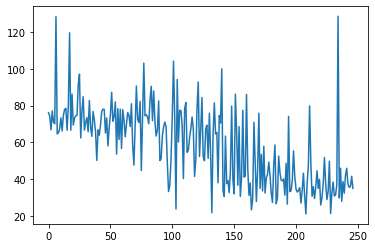

In [50]:
plt.plot(np.arange(len(cost_index)), cost_index)

## Saving data for later use with `np.savez`

In [51]:
np.savez?

Signature: np.savez(file, *args, **kwds)
Docstring:
Save several arrays into a single file in uncompressed ``.npz`` format.

If arguments are passed in with no keywords, the corresponding variable
names, in the ``.npz`` file, are 'arr_0', 'arr_1', etc. If keyword
arguments are given, the corresponding variable names, in the ``.npz``
file will match the keyword names.

Parameters
----------
file : str or file
    Either the filename (string) or an open file (file-like object)
    where the data will be saved. If file is a string or a Path, the
    ``.npz`` extension will be appended to the filename if it is not
    already there.
args : Arguments, optional
    Arrays to save to the file. Since it is not possible for Python to
    know the names of the arrays outside `savez`, the arrays will be saved
    with names "arr_0", "arr_1", and so on. These arguments can be any
    expression.
kwds : Keyword arguments, optional
    Arrays to save to the file. Arrays will be saved in the file wit

In [52]:
np.savez('cost_index.npz', cost_index)

In [53]:
!ls

01_Intro.ipynb                        03_Vectorization.ipynb  cost_index.npz
02_How_to_write_efficient_code.ipynb  04_Submodules.ipynb     README.md


---

## Read more

- [NumPy functions and methods overview](https://numpy.org/devdocs/user/quickstart.html#functions-and-methods-overview)
- [NumPy Quickstart guide](https://numpy.org/devdocs/user/quickstart.html)
- [NumPy for absolute beginners](https://numpy.org/devdocs/user/absolute_beginners.html)